# EXAM SIMULATION: 
## Starting time: I don't even know
## End before: as soon as possible
## Actual time at which I finished: it took me forever

#### Notice: 
             1. the exam is considered finished once you've pulled the exercise on your GitHub repository. 
             2. during the exam you don't have access to internet, only a few library instructions.  

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [34]:
def from_base(string, base): #converts string to base
    string = string.upper()
    string = list(reversed(string))
    n = 0
    for i in range(len(string)): 
        if base == 16: 
            if string[i] == 'A': 
                string[i] = 10
            if string[i] == 'B': 
                string[i] = 11
            if string[i] == 'C': 
                string[i] = 12
            if string[i] == 'D': 
                string[i] = 13
            if string[i] == 'E': 
                string[i] = 14
            if string[i] == 'F':
                string[i] = 15
                
        n+=int(string[i])*base**i        
    return n

def to_base(n, base): # double-dabble algorithm or analogous for hex
    lis = []
    while n != 0: 
        lis.append(n % base)
        n = n // base
        
    lis = list(reversed(lis))  # reverse the list to get correct digits order

    string = ''
    for i in range(len(lis)): 
        if base == 16: 
            if lis[i] == 10: 
                string += 'A'
            elif lis[i] == 11: 
                string += 'B'
            elif lis[i] == 12: 
                string += 'C'
            elif lis[i] == 13: 
                string += 'D'
            elif lis[i] == 14: 
                string += 'E'
            elif lis[i] == 15:
                string += 'F'
            else:
                string += str(lis[i])  # convert the number to string if it's not a hex digit
        else:
            string += str(lis[i])  # handle non-hexadecimal bases
    return string


#Let's check if the previous two functions work 
print(from_base('3F',16))
print(to_base(63,16))
print(to_base(255, 16))  # Should output "FF"
print(to_base(100, 2))   # Should output "1100100"
print(to_base(100,16))


#Let's now put all together in a single function
def convert(n,orig_base,fin_base):
    if orig_base == 10:
        dec = n
    else: 
        n = str(n)
        dec = from_base(n,orig_base)
    if fin_base == 10:
        return dec
    else:
        return to_base(dec, fin_base)

print(convert(1100100,2,16))

63
3F
FF
1100100
64
64


In [1]:
# Another way to do it: 
def to_dec(num, base): 
    num = str(num)
    num = list(num)
    if base == 16: 
        for idx,ch in enumerate(num):
            if ch == 'A':
                res[idx] = 10
            if ch == 'B': 
                res[idx] = 11
            if ch == 'C': 
                res[idx] = 12
            if ch == 'D': 
                res[idx] = 13
            if ch == 'E': 
                res[idx] = 14
            if ch == 'F': 
                res[idx] = 15
                
    num = [int(n) for n in num]
    num_rev = num[::-1]
    dec = 0
    for idx in range(len(num_rev)): 
        dec += num_rev[idx]*base**idx
    return dec

def from_dec(num, base): 
    """
    Implement double dabble algorithm (or analogous)
        num//base --> take the rest 
         ...
        (last != 0)//base --> take the rest
        invert order

    example: 
        5%2 = 1
        (5//2)%2 = 2%2 = 0
        1%2 = 1
        --> 101
    """
    remainder = []
    while num!= 0: 
        remainder.append(num%base)
        num //= base
    res = remainder[::-1]

    if base != 16: 
        return ''.join([str(ch) for ch in res])
    else: 
        for idx,ch in enumerate(res): 
            if ch == 10:
                res[idx] = 'A'
            if ch == 11: 
                res[idx] = 'B'
            if ch == 12: 
                res[idx] = 'C'
            if ch == 13: 
                res[idx] = 'D'
            if ch == 14: 
                res[idx] = 'E'
            if ch == 15: 
                res[idx] = 'F'
        return ''.join([str(ch) for ch in res])

def from_to(num, base1, base2): 
    dec = to_dec(num, base1)
    return from_dec(dec, base2)

print(from_to(75,10,16))

4B


In [1]:
# Even better way to do it: 

letters = ['A', 'B', 'C', 'D', 'E', 'F']
num = [i for i in range(10,16)]

def to_dec(s,base): 
    s = list(str(s))
    s = s[::-1]
    if base == 16: 
        for i in range(len(s)): 
            for j,alp in enumerate(letters): 
                if s[i] == alp: 
                    s[i] = num[j]
    dec = 0
    for idx,ch in enumerate(s): 
        dec+=int(ch)*(base**(idx))
    return dec

def from_dec(dec,base): 
    """
    The algorithm to follow is: 
        dec % base --> less sign bit
        (dec // base) % base --> another bit
        ...
        so on while (dec // base) != 0
    """
    s = [str(dec % base)]   
    while (dec // base) != 0: 
        dec//= base
        s+= str(dec%base)
    if base == 16: 
        for i,ch in enumerate(list(s)): 
            for j,n in enumerate(num): 
                if int(ch) == n: 
                    s[i] = letters[j]
    s = "".join(s[::-1])
    return s

def from_to(s,base1,base2): 
    return from_dec(to_dec(s,base1),base2)

print(from_to('FF',16,2))

11111111


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [1]:
def floating(word): 
    word = str(word)
    if len(word) != 32: 
        raise ValueError("The given word is not 32 bit long!")
    sign = int(word[0])
    exponent = int(word[1:9],2)
    mantissa = word[9:]
    mant_value = 1
    for idx,val in enumerate(mantissa): 
        mant_value += int(val)*(2**(-idx - 1))
    n = (-1)**sign * mant_value *2 **(exponent - 127)
    return n

print(floating('01000000101110000000000000000000'))

5.75


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [68]:
# Detecting underflow limit
under_var = 1.0
while under_var != 0:
    last_under = under_var
    under_var /= 2
print(f"Underflow limit (smallest non-zero positive value): {last_under}")

# Detecting overflow limit
upper_var = 1.0
while upper_var != float('inf'):
    last_upper = upper_var
    upper_var *= 2
print(f"Overflow limit (largest representable value): {last_upper}")


Underflow limit (smallest non-zero positive value): 5e-324
Overflow limit (largest representable value): 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [73]:
epsilon = 1.0
while 1.0 + epsilon > 1.0:
    last_epsilon = epsilon  
    epsilon /= 2.0
print(f"Machine precision: {last_epsilon}")

Machine precision: 2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [3]:
def us_sol(a,b,c): 
    delta = b**2 - 4*a*c
    num1 = -b + np.sqrt(delta)
    num2 = -b - np.sqrt(delta)
    den = 2*a
    return num1/den, num2/den

def alt_sol(a,b,c):
    delta = b**2 - 4*a*c
    num = 4*a*c
    den1 = 2*a*(-b-np.sqrt(delta))
    den2 = 2*a*(-b+np.sqrt(delta))
    return num/den1, num/den2

def res(x): 
    return a*x**2 + b*x + c 
    
a = 0.001
b = 1000
c = 0.001

print("Roots by means of usual formula:", us_sol(a,b,c))
print("Residuals:", res(us_sol(a,b,c)[0]), res(us_sol(a,b,c)[1]))
print()
print("Roots by means of alternative formula", alt_sol(a,b,c))
print("Residuals:", res(alt_sol(a,b,c)[0]), res(alt_sol(a,b,c)[1]))
print()
print("""We notice that the second formula does much better in the first root, much worse on the second. In both cases we have
roundoff error due to sqrt(delta) that can be represented only with a finite amount of digits. Moreover tho:
-  In the first case, since b >> 4ac we have what's called 'catastrophic cancellation' we could lose information because the difference 
of two numbers is lower than machine precision. This error is moreover made more relevant by the division by a very small number. 
- In the second case instead, we get a very large error due to the division by a very small number which makes the small error at 
denominator (due to both cancellation and roundoff) become very big.""")

def best_sol(a,b,c): 
    if b >= 0: 
        return alt_sol(a,b,c)[0], usual_sol(a,b,c)[1]
    else: 
        return usual_sol(a,b,c)[0], alt_sol(a,b,c)[1]


NameError: name 'np' is not defined

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

approximation of the derivative of f(x) = x(x-1) in 1: 1.010000000000001
approximation in 1 for 0.0001: 1.0000999999998899
approximation in 1 for 1e-06: 1.0000009999177333
approximation in 1 for 1e-08: 1.0000000039225287
approximation in 1 for 1e-10: 1.000000082840371
approximation in 1 for 1e-12: 1.0000889005833413
approximation in 1 for 1e-14: 0.9992007221626509


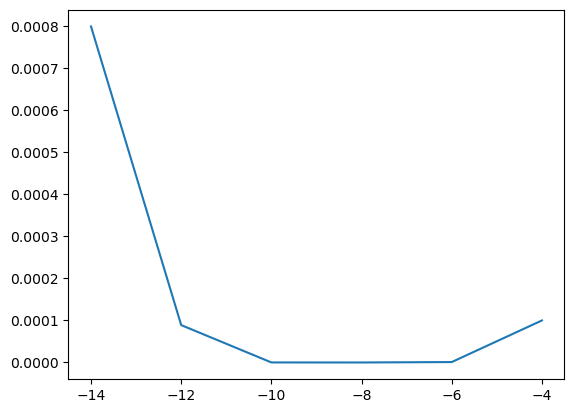

In [35]:
def func(x): 
    return x*(x-1)

# Calculate the derivative of the function at the point  using the derivative definition:
def derivative(f,x,delta): 
    num = f(x+delta) - f(x)
    return num/delta

print(f"approximation of the derivative of f(x) = x(x-1) in 1: {derivative(func,1,10**(-2))}")
# The true value analitically would be 1

# Repeat the calculation for the following list of deltas
deltas = [10**(-4), 10**(-6), 10**(-8), 10**(-10), 10**(-12), 10**(-14)]

residuals = []
for delta in deltas: 
    print(f"approximation in 1 for {delta}: {derivative(func,1,delta)}")
    residuals.append(derivative(func,1,delta)-1)

from math import log10
log_deltas = [log10(delta) for delta in deltas]

import matplotlib.pyplot as plt
plt.plot(log_deltas, [abs(residual) for residual in residuals])

### COMMENT: 
We can see that: 
   - For very small delta values (around 10^-14), the approximation becomes less accurate
   - There appears to be an optimal range where the approximation is most accurate (around 10^-8 to 10^-12)
   - For larger delta values, the approximation is also less accurate

The total error is indeed the sum of: 
- **catastrophic cancellation**, due to the fact that when f(delta+x) is very close to f(x), the difference makes us lose some signficant digits, so the difference we get is not really accurate (because the real value of the difference might be smaller than machine precision). This error gets even worse since we're dividing by a very small delta.
- **truncation error**, due to the fact that we're truncating Taylor series. This error decreases as we decrease delta. 

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [1]:
from math import sqrt
import numpy as np
import time

def semicircle(x): 
    return sqrt(1-x**2)
    
def riemann_sum(inf,sup,func, N):
    domain = abs(sup - inf)
    step_width = domain/N
    lower_lim = np.arange(inf,sup,step_width)
    upper_lim = np.arange(inf+step_width, sup+step_width,step_width)
    intervals = list(zip(lower_lim,upper_lim))
    mid_points = []
    h = 2/N
    for i in range(len(intervals)): 
        mid = (upper_lim[i] - lower_lim[i])/2
        mid_points.append(mid)
    terms = [h*func(mid) for mid in mid_points]
    return sum(terms)

print("Result of Riemann sum:", riemann_sum(-1,1,semicircle, 100))

print(f"Riemann sum distance from actual value:{abs(riemann_sum(-1,1,semicircle, 100) - np.pi/2)}")

# Find now the maximum N possible to stay within a given time
def find_max_N(max_attempts=100):
    N = 100
    best_N = N
    attempts = 0
    
    while attempts < max_attempts:
        try:
            print(f"Testing N = {N}...")  # Added to show progress
            start_time = time.time()
            riemann_sum(-1, 1, semicircle, N)
            elapsed_time = time.time() - start_time
            
            if elapsed_time > 1.0:
                return best_N
            
            best_N = N  # Update best_N only if the calculation succeeded
            
            if elapsed_time < 0.5:
                N *= 100  # More conservative growth
            else:
                N += 100
                
            attempts += 1
            
        except Exception as e:
            print(f"Error occurred at N = {N}: {e}")
            return best_N
    
    print("Reached maximum number of attempts")
    return best_N

print("Testing different N values to find maximum...")
max_N = find_max_N()
result = riemann_sum(-1, 1, semicircle, max_N)
error = abs(result - np.pi/2)

print(f"\nMaximum N within 1 second: {max_N}")
print(f"Final result: {result}")
print(f"Error from true value: {error}")

Result of Riemann sum: 1.9998999974998752
Riemann sum distance from actual value:0.4291036707049787
Testing different N values to find maximum...
Testing N = 100...
Testing N = 10000...
Testing N = 1000000...
Testing N = 100000000...

Maximum N within 1 second: 1000000
Final result: 1.999999999999
Error from true value: 0.42920367320410335


In [2]:
result_min = riemann_sum(-1, 1, semicircle, 60*max_N)
error_min = abs(result - np.pi/2)

print(f"Result in 1 minute: {result}")
print(f"Error from true value: {error}")

Result in 1 minute: 1.999999999999
Error from true value: 0.42920367320410335


### COMMENT: 
The gain is negligible. 
